<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Mini Project <br>  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

Based on given data of visitors browsing for online shopping, build different clusters to know whether person is only browsing and visiting multiples pages or also generating revenue for the shoppers as well.  Analyse and compare the clusters formed with the existing Revenue Column.

## Data Definition

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

**Administrative :** This is the number of pages of this type (administrative) that the user visited.
    
**Administrative_Duration :** This is the amount of time spent in this category of pages.
    
**Informational :** This is the number of pages of this type (informational) that the user visited.
    
**Informational_Duration :** This is the amount of time spent in this category of pages.
    
**ProductRelated :** This is the number of pages of this type (product related) that the user visited.
    
**ProductRelated_Duration :** This is the amount of time spent in this category of pages.
    
**BounceRates :** The percentage of visitors who enter the website through that page and exit without triggering any
    additional tasks.
    
**ExitRates :** The percentage of pageviews on the website that end at that specific page.
    
**PageValues :** The average value of the page averaged over the value of the target page and/or the completion of an eCommerce
    
**SpecialDay :** This value represents the closeness of the browsing date to special days or holidays 
    (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized.
    
**Month :** Contains the month the pageview occurred, in string form.
    
**OperatingSystems :** An integer value representing the operating system that the user was on when viewing the page.
    
**Browser :** An integer value representing the browser that the user was using to view the page.
    
**Region :** An integer value representing which region the user is located in
    
**Traffic Type :** An integer value representing what type of traffic the user is categorized into.
    
**VisitorType :** The type of visitor coming on the site. The visitor is of 3 types : new, returning visitor or 
        other(guest_visitor). (Categorical)
        
**Weekend :** A boolean representing whether the session is on a weekend.
    
**Revenue :** A boolean representing whether or not the user completed the purchase. It is categorical column (True/ False).
    Revenue is our target variable. We have to predict the revenue will be generated or not. 


## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Distribution of Variables](#dist)**
    - 2.4 - **[Missing Value Treatment](#null)**
    - 2.5 - **[Scale the Data](#scale)**
3. **[Principal Component Analysis (PCA)](#pca)**
    - 3.1 - **[Covariance Matrix](#cov_mat)**
    - 3.2 - **[Compute Eigenvalues and Eigenvectors](#eigen)**
    - 3.3 - **[Decide Number of Principal Components](#components)**
    - 3.4 - **[Principal Components](#comp)**
    - 3.5 - **[PCA using Python Library](#pcafunction)**
4. **[Linear Discriminant Analysis (LDA)](#lda)**
5. **[Compare the Performance](#perf)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from numpy.linalg import eig

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first five observations.

In [3]:
df1 = pd.read_csv('online_shoppers_intention.csv')
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#### Compute dimensions of the data

In [4]:
df1.shape

(12330, 18)

**Interpretation**: There are 12330 observations and 18 variables in the dataset.         

<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [5]:
df1.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

**Interpretation**: We can see that the data type of all the variables is as per the data definition.

<a id="dist"></a>
## 2.3 Distribution of Variables

**Distribution of independent variables.**

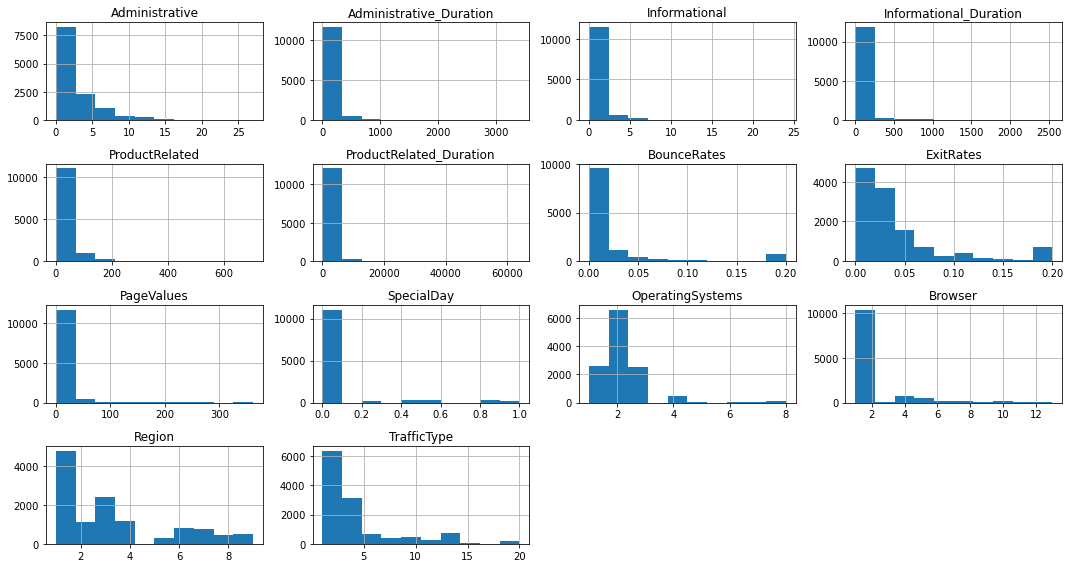

In [6]:
df1.drop(['Revenue'], axis = 1).hist()

plt.tight_layout()

plt.show()

**Interpretation**: The above histograms display the distribution of each variable. 

<a id="null"></a>
## 2.4 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [7]:
Total = df1.isnull().sum().sort_values(ascending=False)          

Percent = (df1.isnull().sum()*100/df1.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Administrative,0,0.0
Administrative_Duration,0,0.0
Weekend,0,0.0
VisitorType,0,0.0
TrafficType,0,0.0
Region,0,0.0
Browser,0,0.0
OperatingSystems,0,0.0
Month,0,0.0
SpecialDay,0,0.0


**Interpretation:** The above output shows that there are no missing values in the data.

<a id="scale"></a>
## 2.7 Univariate Analysis

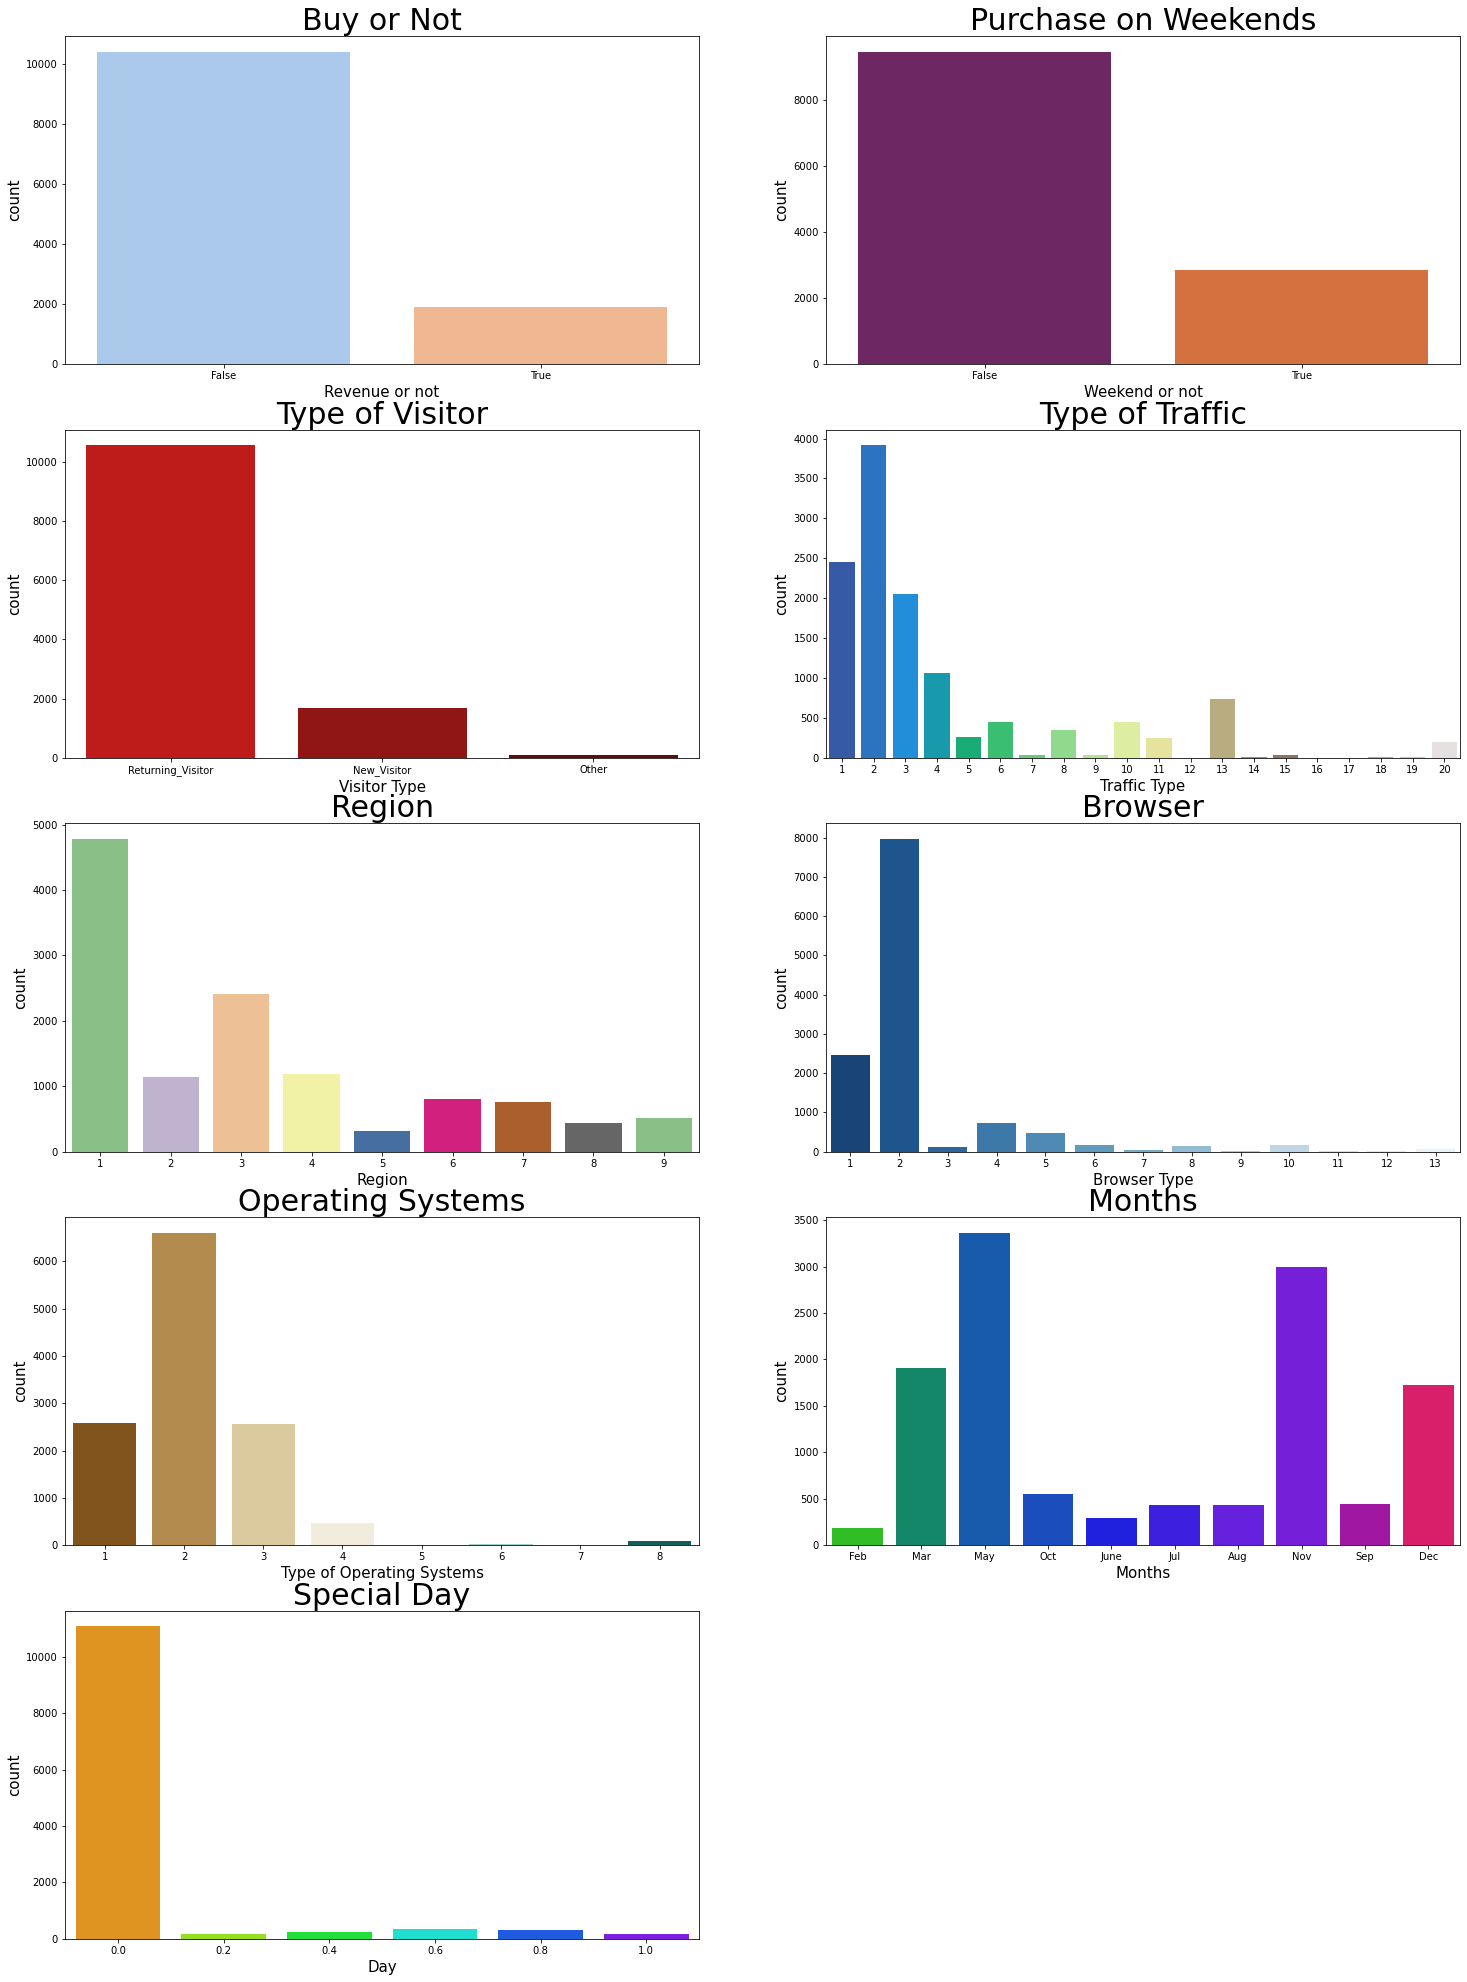

In [8]:
# Checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (25, 35)

plt.subplot(5, 2, 1)
sns.countplot(df1['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# Checking the Distribution of customers on Weekend
plt.subplot(5, 2, 2)
sns.countplot(df1['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

#Checking the Distribution of type of visitors
plt.subplot(5, 2, 3)
sns.countplot(df1['VisitorType'], palette = 'flag')
plt.title('Type of Visitor', fontsize = 30)
plt.xlabel('Visitor Type', fontsize = 15)
plt.ylabel('count', fontsize = 15)

#Checking the Distribution of type of Traffic
plt.subplot(5, 2, 4)
sns.countplot(df1['TrafficType'], palette = 'terrain')
plt.title('Type of Traffic', fontsize = 30)
plt.xlabel('Traffic Type', fontsize = 15)
plt.ylabel('count', fontsize = 15)

#Checking the Distribution of type of Region
plt.subplot(5,2, 5)
sns.countplot(df1['Region'], palette = 'Accent')
plt.title('Region', fontsize = 30)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('count', fontsize = 15)

#Checking the Distribution of type of Browser
plt.subplot(5, 2, 6)
sns.countplot(df1['Browser'], palette = 'Blues_r')
plt.title('Browser', fontsize = 30)
plt.xlabel('Browser Type', fontsize = 15)
plt.ylabel('count', fontsize = 15)

#Checking the Distribution of type of Operating systems
plt.subplot(5, 2, 7)
sns.countplot(df1['OperatingSystems'], palette = 'BrBG')
plt.title('Operating Systems', fontsize = 30)
plt.xlabel('Type of Operating Systems', fontsize = 15)
plt.ylabel('count', fontsize = 15)

#Checking the Distribution of Months
plt.subplot(5, 2, 8)
sns.countplot(df1['Month'], palette = 'prism_r')
plt.title('Months', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('count', fontsize = 15)

#Checking the Distribution of Special Days
plt.subplot(5, 2, 9)
sns.countplot(df1['SpecialDay'], palette = 'gist_rainbow')
plt.title('Special Day', fontsize = 30)
plt.xlabel('Day', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

<a id="scale"></a>
## 2.8 Bivariate Analysis

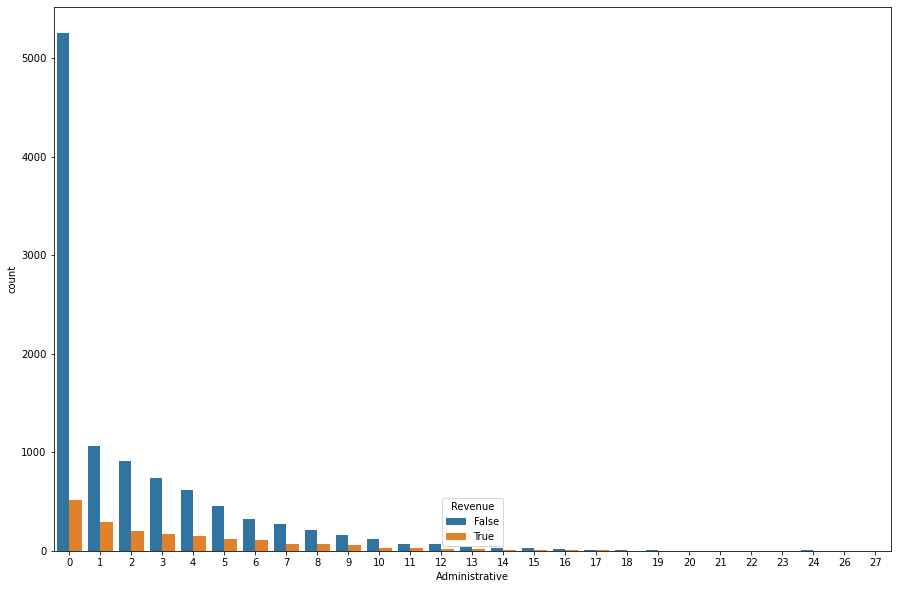

In [9]:
plt.rcParams['figure.figsize']=(15,10)
sns.countplot(df1['Administrative'],hue = df1["Revenue"])
plt.show()

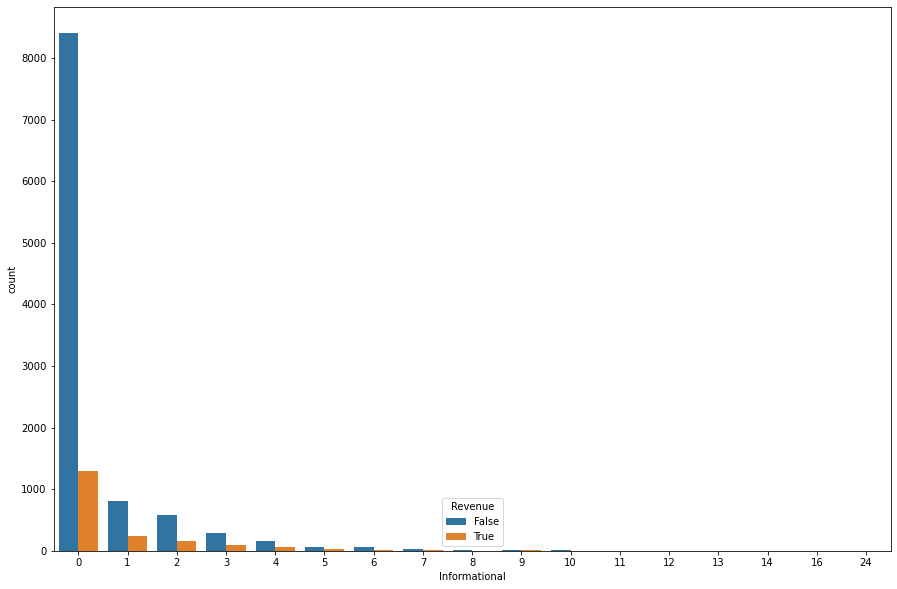

In [10]:
sns.countplot(df1['Informational'],hue = df1["Revenue"])
plt.show()

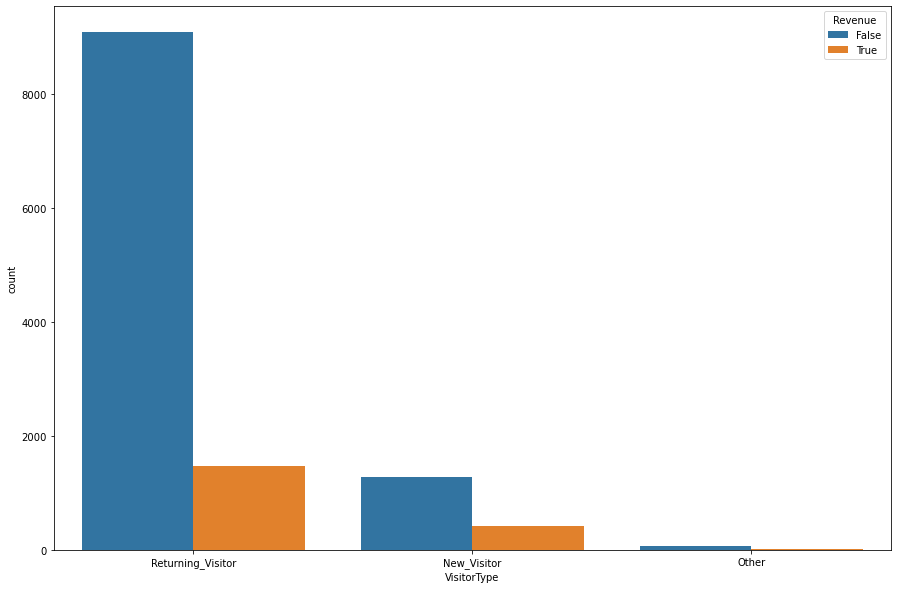

In [11]:
sns.countplot(df1['VisitorType'],hue = df1["Revenue"])
plt.show()

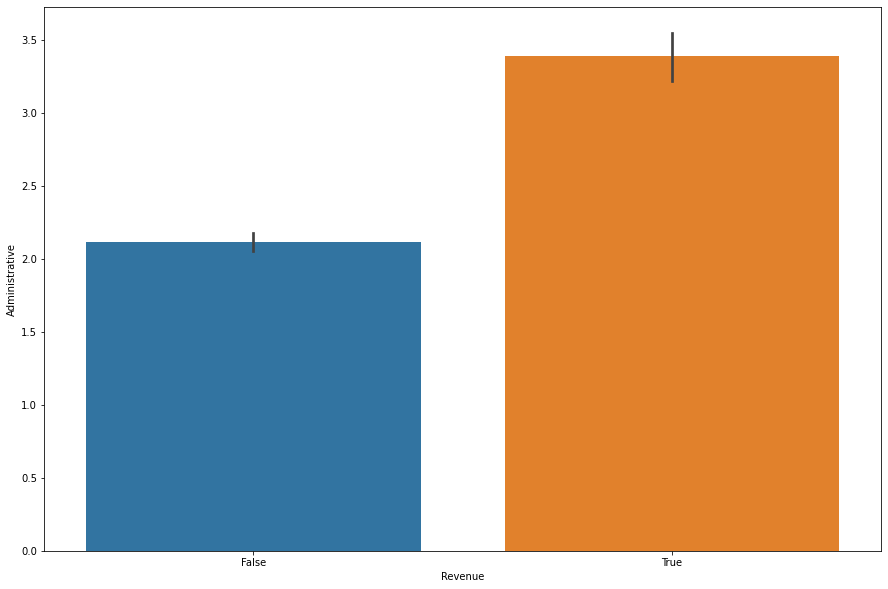

In [12]:
sns.barplot(data = df1 , x = 'Revenue',y = 'Administrative')
plt.show()

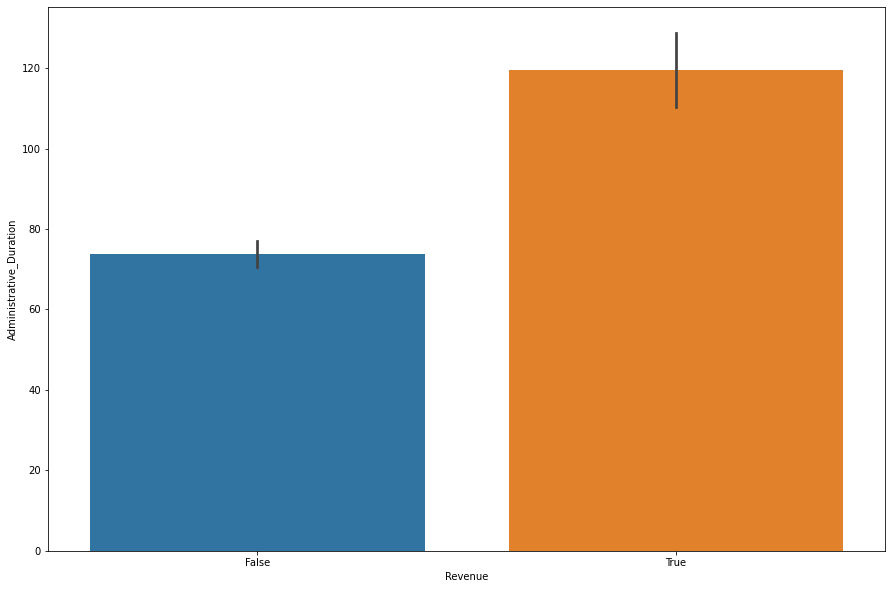

In [13]:
sns.barplot(data = df1 , x = 'Revenue',y = 'Administrative_Duration')
plt.show()

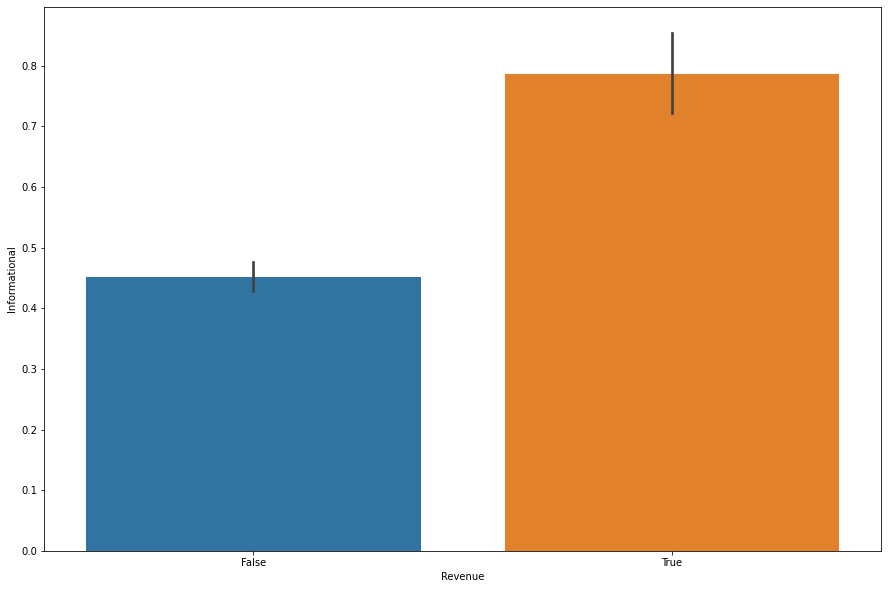

In [14]:
sns.barplot(data = df1 , x = 'Revenue',y = 'Informational')
plt.show()

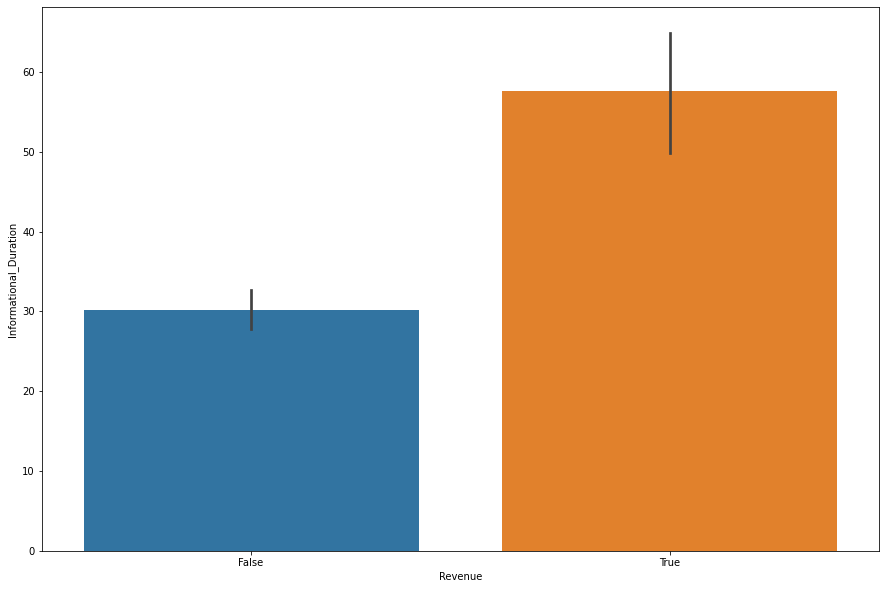

In [15]:
sns.barplot(data = df1 , x = 'Revenue',y = 'Informational_Duration')
plt.show()

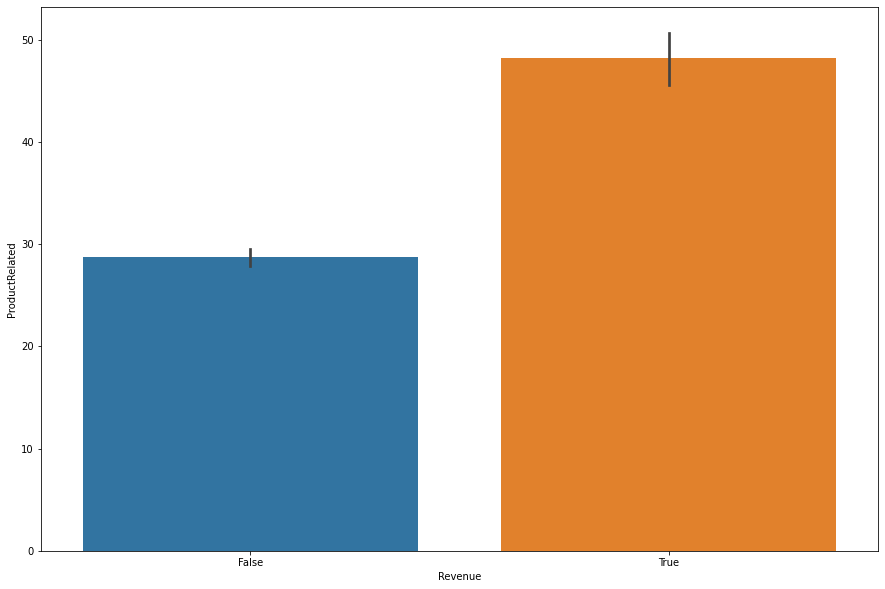

In [16]:
sns.barplot(data = df1 , x = 'Revenue',y = 'ProductRelated')
plt.show()

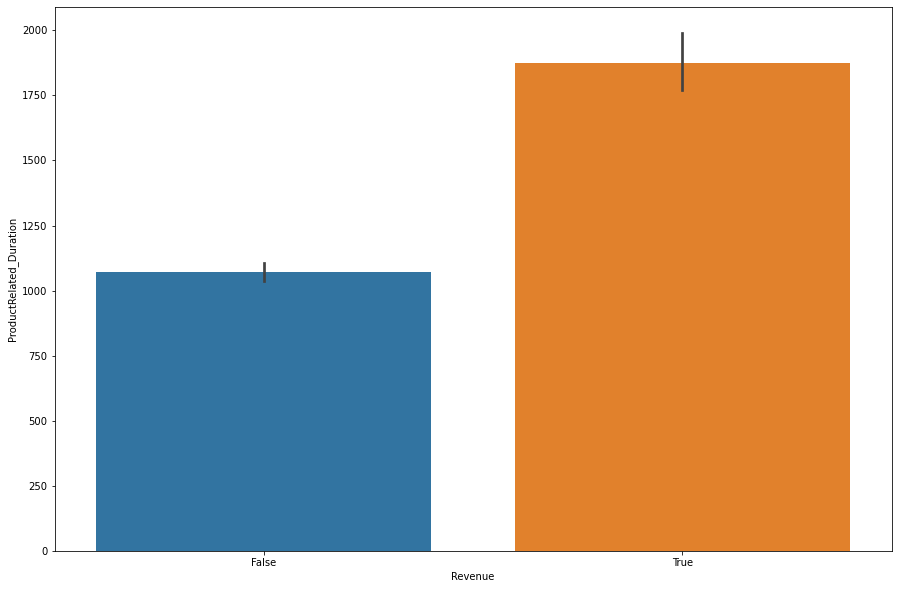

In [17]:
sns.barplot(data = df1 , x = 'Revenue',y = 'ProductRelated_Duration')
plt.show()

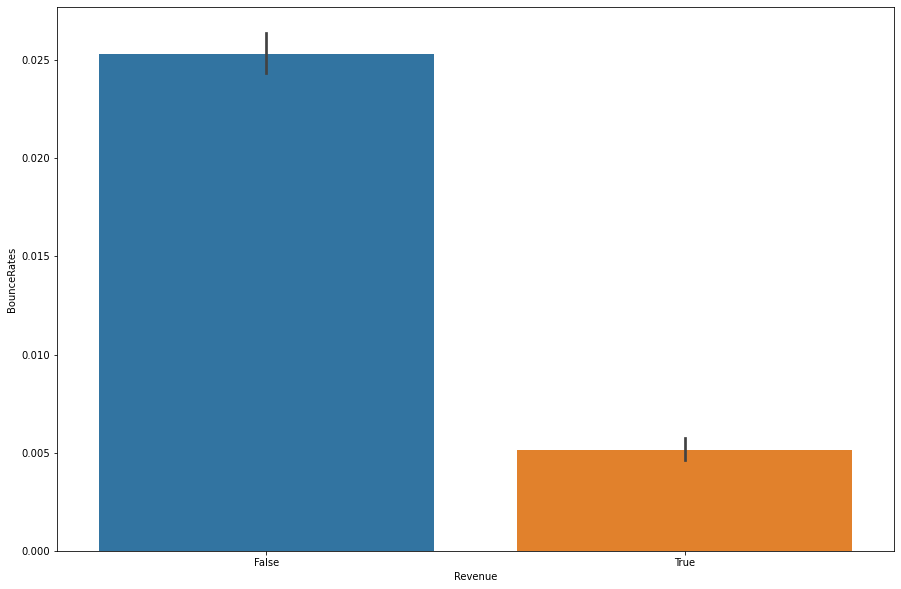

In [18]:
sns.barplot(data = df1 , x = 'Revenue',y = 'BounceRates')
plt.show()

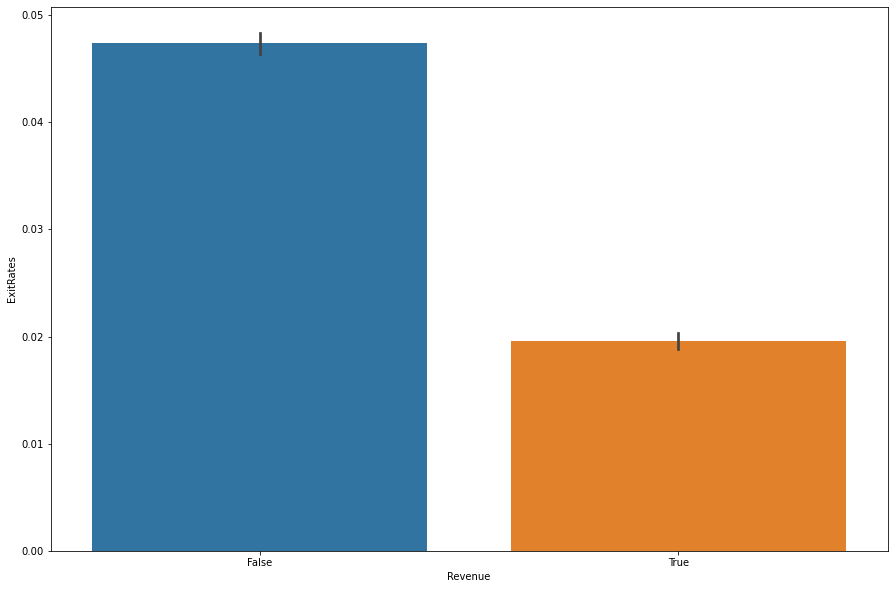

In [19]:
sns.barplot(data = df1 , x = 'Revenue',y = 'ExitRates')
plt.show()

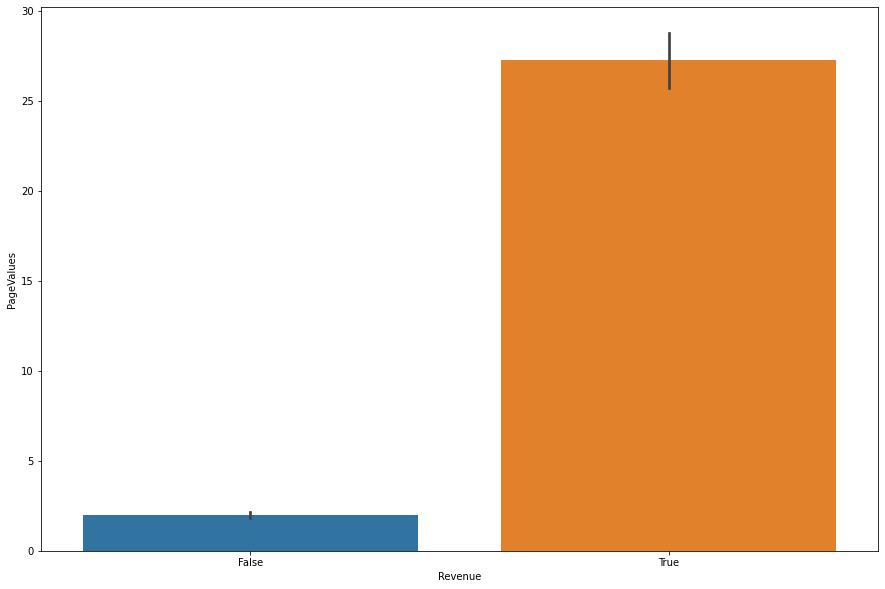

In [20]:
sns.barplot(data = df1 , x = 'Revenue',y = 'PageValues')
plt.show()

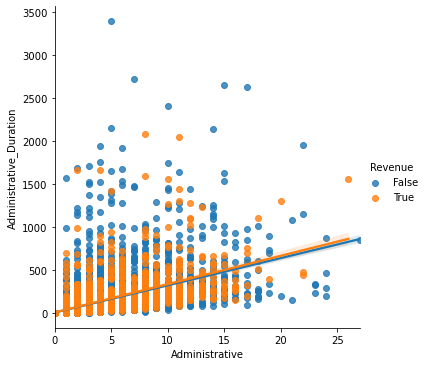

In [21]:
sns.lmplot(data=df1,x='Administrative', y='Administrative_Duration', hue='Revenue');

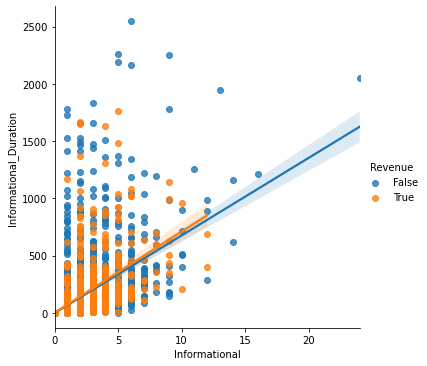

In [22]:
sns.lmplot(data=df1,x='Informational', y='Informational_Duration', hue='Revenue');

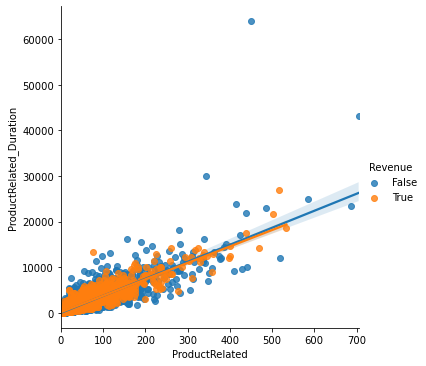

In [23]:
sns.lmplot(data=df1,x='ProductRelated', y='ProductRelated_Duration', hue='Revenue');

* From the above graphs, we observe that Administrative and Administrative_duration are positively correlated.
* Similarly, the other two types of page and their duration is also positively correlated.
* The visitors who have made transaction for online purchases visit less number of pages than the visitors who have not 
  made transaction.
* Therefore, Page view and duration has no effect on the revenue.

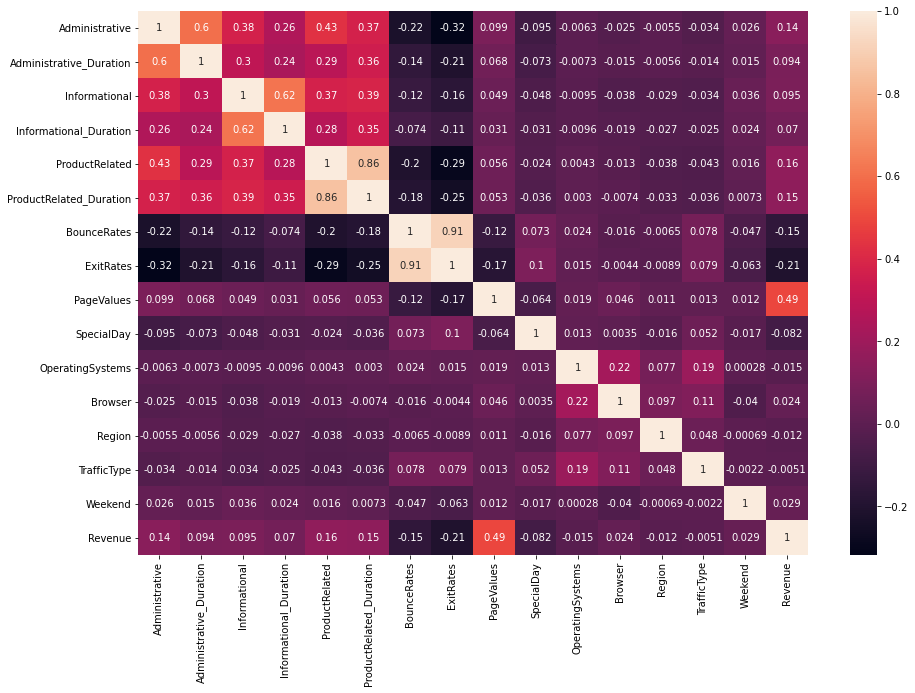

In [24]:
sns.heatmap(df1.corr() , annot= True)
plt.show()

<a id="scale"></a>
## 2.5 Outliers Analysis and Treatment

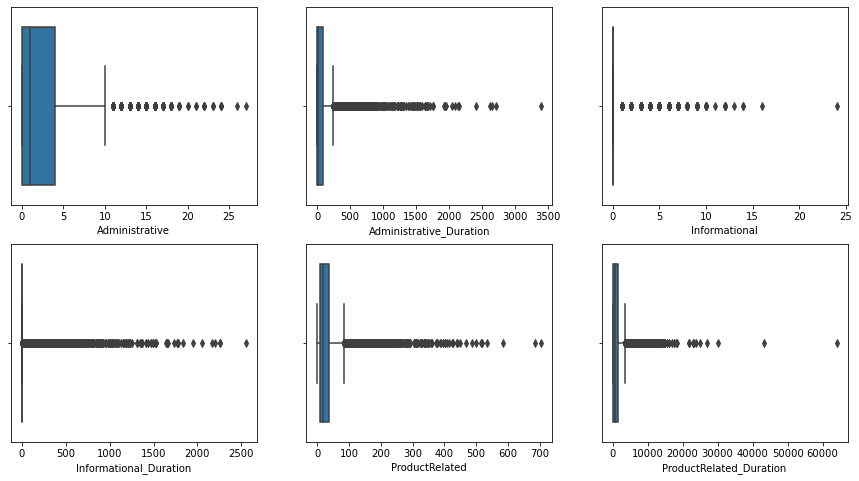

In [25]:
df1_num = df1.drop(['Revenue'], axis = 1)

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 8))

for variable, subplot in zip(df1_num.columns, ax.flatten()):
    
    sns.boxplot(df1[variable], ax = subplot)

plt.show()

**Interpretation:** There is no need to remove the outliers in this case, as more the people will spend the time on the site higher the chances that customer will generate the revenue.

In [26]:
df1.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [27]:
df1['Weekend'] = df1['Weekend'].astype(object)

In [28]:
df1['Revenue'] = df1['Revenue'].astype(object)

In [29]:
df1 = df1.drop(['OperatingSystems','Browser','Region','TrafficType'], axis=1)

In [30]:
Q1 = df1.quantile(0.25)

Q3 = df1.quantile(0.75)

IQR = Q3 - Q1

df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

df1.shape

(5258, 14)

<a id="scale"></a>
## 2.6 Scale the data

**We don't perform scaling as it will reduce the importance of significant variables such as 'Duration Spent on Product Related' and it will cause hinderance in correct prediction and our target customers from whom we need to generate the revenue.**

<a id='pca'></a>
# 3. Principal Component Analysis (PCA)

It is an unsupervised dimension reduction technique used to transform the higher dimensional dataset to a lower dimension. It considers the linear combination of all the numerical variables and create principal components that are orthogonal to each other. These principal components explain most of the variance in the data with lower dimension. 

<a id='cov_mat'></a>
## 3.1 Covariance Matrix

PCA aims to minimize the distortions and to summarize the essential information in the data. These distortions (noise, redundancy, etc.) reflect in the off-diagonal values of the covariance matrix.

In [31]:
# generate the covariance matrix using 'cov' function
# consider the transpose of the dataframe 'df_attr_std' to obtain the covarinace between the independent variables (columns)  
cov_mat = np.cov(df_attr_std.T)

# as 'cov_mat' is a numpy array, select first five observations with [0:5]
print(cov_mat[0:5])

NameError: name 'df_attr_std' is not defined

**Interpretation:** The covariance matrix is a square matrix of dimension 14x14. The diagonal entries correspond to the variance of each variable (which is always equal to 1, as we are using the standardized data) and the off-diagonal entries represent the covariances between the variables.

<a id='eigen'></a>
## 3.2 Compute Eigenvalues and Eigenvectors 

Eigenvalues: The diagonal values of the diagonalized covariance matrix are the `eigenvalues` of the covariance matrix. Large eigenvalues correspond to the large variance in the data.<br>
                        
Eigenvectors: The eigenvectors corresponds to the eigenvalues give directions of the maximum variation in the data.

In [ ]:
# use 'eig' function to compute eigenvalues and eigenvectors of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

**Interpretation:** For the 14x14 covariance matrix, we get 14 eigenvalues and eigenvectors. The eigenvector corresponding to the largest eigenvalue represent the direction of the highest variation in the dataset.

<a id='components'></a>
## 3.3 Decide Number of Principal Components

In [ ]:
# create a list of eigenvalues
eig_val = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order
eig_val.sort(reverse = True)

# print the sorted list
print(eig_val)

To decide the number of components, we can use different methods as: `Kaiser criterion`, `Scree plot`, `Percentage of Explained Variation`.

#### 1) Kaiser criterion: This criterion considers the number of pricipal components for which the eigenvalue is greater than 1. This criterion suffers a drawback of selecting more number of components as the eigenvalues very close to 1 may not contribute significantly in explaining the variation in the data.

Here the first five eigenvalues are greater than 1. Thus we can consider 5 principal components using kaiser criterion.

#### 2) Scree plot: Plot the eigenvalues and choose the number of components corresponding to the elbow point.

In [ ]:
# 'bp' represents blue color and pentagonal shape of points
plt.plot(eig_val,'bp')            

# plot a line plot
plt.plot(eig_val) 

# set the axes and plot labels
# set the fontsize using 'fontsize'
plt.title('Scree Plot', fontsize = 15)
plt.xlabel('Principal Components', fontsize = 15)    
plt.ylabel('Explained Variance', fontsize = 15)      

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s ='Elbow Point', xy=(2.05,1.2), xytext=(2, 1.8), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))

# display the plot
plt.show()   

**Interpretation**: It can be observed that, after the elbow point, the principal components do not contribute much to the variance in the data. 
The Kaiser criterion considers the number of principal components as 5, but the scree plot shows that only first three components explains most of the variation.

#### 3) Percentage of Explained Variation: Calculate the percentage of variation explained by each principal component. We consider the number of components that explain most of the variation.

The eigenvalue represents the total variance explained by that principal component. 

The proportion of variation explained by the i<sup>th</sup> principal component is calculated by taking the ratio of i<sup>th</sup> eigenvalue to the sum of all the eigenvalues. To calculate the percentage, multiply this ratio by 100.

In [ ]:
# calculate the percentage of variation explained by each principal component
# create an empty list to store the percentage of variation explained by each principal component
percent_var = []

# use a 'for' loop to calculate the percentage of variation for each component
for i in eig_val:
    variation = (i/sum(eig_val))*100
    
    # add the values to the list 'percent_var'
    percent_var.append(variation)
    
# print the percentage of variation
percent_var

**Interpretation**: It can be seen that the first principal component explains 30.7% variation in the data.

Now calculate the cumulative percentage of variation.

In [ ]:
# the 'cumsum()' returns the cumulative sum 
np.cumsum(percent_var)

**Interpretation**: We can see that the first five components explain approximately 64% of the variation in the data. By considering the 3 components as per the scree plot, the components explain approximately 50% of the variation. To explain 95% of the variation in the data, we need to consider ten principal components.

For this dataset, let us choose the `five` principal components that explain 64% of the variation.

Thus, we take the dot product of the scaled data and the eigenvectors corresponding to the first five eigenvalues to get the principal components. 

<a id='comp'></a>
## 3.4 Principal Components 

In [ ]:
# consider the eigenvectors corresponding to the first five highest eigenvalues
# these eigenvectors are the 1st, 2nd, 9th, 10th and 11th columns of 'eig_vec' 
eigenvector = eig_vec[:,[0,1,8,9,10]]

# print the vectors
eigenvector

**Interpretation**: The first column in the above output represents the direction of maximum variation in the data. The second column represents the direction of the 2nd most highest variation in the data and so on.

Now generate a new dataset of reduced dimensions by multiplying standardize data and set of eigenvectors.

In [ ]:
# take the dot product of 'df_attr_std' with 'eigenvector' to obtain new dataset
# create a dataframe of principal components
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(df_attr_std.dot(eigenvector), columns= ['PC1','PC2', 'PC3', 'PC4', 'PC5'])

# head() to display top five rows
df_pca.head()

In [ ]:
# check the shape of the transformed data
df_pca.shape

**Interpretation**: In the above step, we obtained the data with reduced dimensions. The new dataset has 2233 observations and 5 columns, i.e. we have decreased the number of features from 14 to 5.

Now, we use the in-built python function `PCA()` from the sci-kit learn library to calculate the principal components.

<a id='pcafunction'></a>
## 3.5. PCA using Python Library 

Use the in-built PCA function from the sklearn library to perform PCA and check the results with the obtained data with reduced dimensions (using scratch method). We consider number of components = 5.

In [ ]:
# specify the required no of components to the parameter 'n_components'
# pass the 'random_state' to get the same output for multiple runs
pca = PCA(n_components = 5, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca.fit_transform(df_attr_std)

In [ ]:
# create a dataframe of principal components
# pass the required column names to the parameter 'columns'
df_pca_sklearn = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# head() to display top five rows of the transformed data
df_pca_sklearn.head()

In [ ]:
# check the shpe of the new dataset
df_pca_sklearn.shape

**Interpretation**: In the above step, we obtained the data with reduced dimensions. The new dataset has 2233 observations and 5 columns. 

The above dataframe shows that, the sign of the fifth principal component is reversed in the output obtained from the in-built function, as compared to the results obtained from scratch.

The signs depend on how the algorithm solves the eigenvector problem underlying the PCA operation. The scratch method is using the eigendecomposition method to compute eigenvalues and eigenvectors; while in-built function uses the SVD method.
The difference in the signs does not affect the variances explained by the principal components. Let, PC1 be the component of maximum variation. If we consider -(PC1) instead of PC1, then also we obtain the same variation in the data.

#### Find the loadings of the principal components

In [ ]:
# the 'components_' returns the loading for each principal component
pca.components_

**Interpretation**: Each row in the above array represents the loadings for the principal components.

<a id='lda'></a>
# 4. Linear Discriminant Analysis (LDA)

LDA is one of the dimension reduction techniques which is a supervised algorithm as it takes the labels of the target/ dependent variable into consideration. This method reduces dimensionality of the data and also at the same time preserves as much of the class discrimination information as possible. 

We project the original data onto the lower dimensional vectors and calculate the linear discriminants that returns maximum separation between the classes of the target vraiable.

In [ ]:
# consider the target variable
df_target = df_attr['Attrition']

# check the unique classes in the target variable
df_target.unique()

**Interpretation**: The output shows that, there are two classes in the target variable.

Thus, we project the data on a 1-D line that can maximize the separation between these two classes.

In [ ]:
# instantiate the LDA
# here we have 2 classes in target variable, thus we choose n_components as 2 - 1 = 1
lda = LDA(n_components=1)

# fit_transform() computes the linear discriminants on the given data 
# pass the standardized data of independent variables to the parameter 'X'
# pass the target variable to the parameter 'y'
discriminant = lda.fit_transform(X = df_attr_std, y = df_target)

In [ ]:
# create a dataframe of linear discriminant
# pass the required column names to the parameter 'columns'
df_lda = pd.DataFrame(data = discriminant, columns = ['LD1'])

# head() to display top five rows of the transformed data
df_lda.head()

In [ ]:
# check the shape of the transformed data
discriminant.shape

**Interpretation**: In the above step, we obtained the data with reduced dimensions. The new dataset has 2233 observations and 1 columns. 

<a id='perf'></a>
# 5. Compare the Performance

#### We will compare the model performance of the decision tree algorithm on the original dataset and the transformed data obtained by PCA and LDA.

Let us split the dataset into train and test sets and perform PCA and LDA to transform the train and test sets. Use the transformed train-test sets to compute the accuracy of the model.

In [ ]:
# consider the independent variables
# convert the standardized array of the dataest to the dataframe
X = pd.DataFrame(df_attr_std)

# consider the target variable
y = df_target

In [ ]:
# split the original dataset into train and test set
# pass the independent and dependent variables
# pass the required proportion of the test set to the parameter 'test_size'
# pass the 'random_state' to obtain the same sets for multiple code runs
# pass the target variable to the parameter 'stratify', to obtain the balance of target labels in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify = y)

Now let us fit the PCA on the train set and transform the train and test sets accordingly. We compute the 5 principal components.

In [ ]:
# specify the required no of components to the parameter 'n_components'
# pass the 'random_state' to get the same output for multiple runs
pca = PCA(n_components = 5, random_state = 10)

# fit the PCA on train set
# the 'transform()' computes the principal components 
# pass the train data to transform the train and test sets
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Now let us fit the LDA on the train set and transform the train and test sets accordingly.

In [ ]:
# instantiate the LDA
# here we have 2 classes in target variable, thus we choose n_components as 2 - 1 = 1
lda = LDA(n_components = 1)

# fit the LDA on train set
# the 'transform()' computes the linear discriminants 
# pass the train data to transform the train and test sets
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

#### Let us create a function that runs the decision tree algorithm and finds the accuracy on the test set. 

In [ ]:
# define a function to build a decision tree model and calculate the accuracy on the test set
# pass the train and test sets as the 
def decisiontree_model_run(X_train, X_test, y_train, y_test):
    
    # create a decision tree classifier object
    # use 'random_state' to obtain the same results for multiple code runs
    df_tree = DecisionTreeClassifier(random_state=10)
    
    # fit the decision tree model on the train set
    df_tree.fit(X_train, y_train)
    
    # predict the target class for test set
    y_pred = df_tree.predict(X_test)
    
    # print the accuracy score
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

#### Run the decision tree classifier on the original data

In [ ]:
%%time
# '%%time' returns the time required for the execution of the model

# pass the train and test set of the original data
decisiontree_model_run(X_train, X_test, y_train, y_test)

#### Run the decision tree classifier after performing the PCA on the data

In [ ]:
%%time
# '%%time' returns the time required for the execution of the model

# pass the train and test set of the PCA transformed data
decisiontree_model_run(X_train_pca, X_test_pca, y_train, y_test)

#### Run the decision tree classifier after performing the LDA on the data

In [ ]:
%%time
# '%%time' returns the time required for the execution of the model

# pass the train and test set of the LDA transformed data
decisiontree_model_run(X_train_lda, X_test_lda, y_train, y_test)

**Interpretation:** From the above results, we can see that the model accuracy for the LDA transformed dataset is the same as the original dataset, but the time taken by the LDA is the least. PCA transformed data also took less time to build the model than the original dataset since; the number of features is reduced; but, the accuracy is decreased due to the information loss.